1. Bayes Classifier (Gaussian with MLE Estimate)
2. Naive Bayes Classifier (Gaussian, Binomial and GMM with MLE Estimate)
3. K-means Clustering
4. K-Nearest Neighbor Classifier
5. Principal component analysis 


 ## Bayes Methods Implemented :

1. MLE - Done with Gaussian 
2. Expectation Maximization with GMM 
 
## Densities implemented :
1. GMM
2. Gaussian
3. Binomial and Bernoulli

In [1]:
import json
import random
import time
import math
from ast import literal_eval as make_tuple
import numpy as np
import pandas as pd
import psutil
from utils import mnist_reader
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class multivariate_normal:
    def __init__(self,mean,cov):
        self.mean=mean
        self.cov=cov
    def pdf(self,x):
        return  (1/(np.power(2* np.pi,self.mean.shape[0]/2)*np.power(np.linalg.det(self.cov),0.5))) *np.exp (-0.5 * (np.linalg.multi_dot([(x - self.mean) , (np.linalg.inv(self.cov)), (x - self.mean).T])))
    

In [3]:
def univariate_normal(x,mean,var):
    return  (1/(np.power(2* np.pi*var,0.5))) * np.exp(-0.5 * np.array((x- mean)**2/var,dtype='float'))
def distance(a, b):
    return np.linalg.norm(a-b)

In [4]:
def binomial(test,prob,m):
    return [np.power(prob,x)*np.power(prob,(m-x))*comb(m,x) for x in test]
def comb(n,r):
    f=math.factorial
    return f(n)//f(r)//f(n-r)

In [5]:
#Bayes Gaussian with MLE Estimate    
class GaussianBayes:         
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):        
            class_cond = multivariate_normal(self.mean[i,:],self.cov[i,:])
            prior=self.prior[i]         
            for j in range(test.shape[0]):
                prob_vect[i,j] = prior*class_cond.pdf(test[j])       
        return np.argmax(prob_vect,axis=0)
        
    def fit(self, train,y):
        self.mean = []
        self.cov = []
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            mean_c = np.mean(tr_c, axis=0)
            cov_c=np.cov(tr_c.T.astype(float))
            self.mean.append(mean_c)
            self.cov.append(cov_c)
        self.mean = np.asarray(self.mean)
        self.cov = np.asarray(self.cov)        

In [14]:
#Naive Bayes Implementation of GMM with EM Algorithm
class GMM():
    def __init__(self,mode):
        mean=np.zeros(mode)
        var=np.zeros(mode)
        ltv = np.identity(ltv)
        w = np.tile(z,(int)(Y.size/k) + 1).T
        w = w[0:Y.size] 
        params={'mean':mean,'var':var,'ltv':ltv}
        self.mode=mode
        self.w=w
        self.params=params
        
    def fit(self, train,y,iter_n=1000,*args):
        iterations=0
        while (iterations<iter_n):
            # E-step 
            w_old = w_new
            self.computew(train)
            # new params mean, variance and latent variables
            # M-step 
            self.updateparams(train)   
            iterations+=1
            
    
    def computew(self,train):
        self.w=
    
    def updateparams(self,train):
        p = np.mean(self.w,axis = 0)
        for i in range(k):
            self.params['mean'][i]=np.dot(train, self.w[i])/(p[i])
            self.params['var'][i]=np.dot(self.w[i],(train-self.params['mean'][i])^2)/p[i]
        self.params['ltv']=np.mean(Q,axis=0)
        
    def pdf(self,test,mean,var,w):
        sum1=0
        for i in range(k):
            sum1+=w[k]*(1/(np.power(2* np.pi*var[k],0.5))) * np.exp(-0.5 * np.array((x- mean[k])**2/var,dtype='float'))  
        return sum1

IndentationError: expected an indented block (<ipython-input-14-066a68a17916>, line 31)

In [ ]:
class GMMNB:       
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):
            class_cond=1
            for j in range(self.n_features):
                class_cond = class_cond*GMM.pdf(test[:,j],self.mean[i,j], self.var[i,j])
            prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond
        print(np.argmax(prob_vect,axis=0).shape)
        return np.argmax(prob_vect,axis=0)
        
    def fit(self, train,y,k):
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        self.n_features=train.shape[1]
        self.mean = np.zeros((self.n_classes,self.n_features,k))
        self.var = np.zeros((self.n_classes,self.n_features,k))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                gmm=GMM(k)
                self.mean[i,j,:], self.var[i,j,:],self.weights[i,j,:]=gmm.fit(tr_c[:,j],y[(y==j)
        self.mean = np.asarray(self.mean)
        self.var = np.asarray(self.var)   

In [6]:
# Naive Bayes of Binomial 
class BinomialNB:
    def __init__(self,n_features):
        self.n_features=n_features
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):
            class_cond=1
            for j in range(1,self.n_features):
                pdb.set_trace()
                class_cond = class_cond*binomial(test[:,j],self.prob[i,j],self.m[j])
                prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond       
        return np.argmax(prob_vect,axis=1)
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
        self.m=np.max(train,axis=0)
        self.prior = np.zeros(self.n_classes) 
        self.prob=np.zeros((self.n_classes,self.n_features))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                self.prob[i,j]=np.mean(train[:,j])
        

In [7]:
# Naive Bayes of Gaussian 
class GaussianNB():
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):
            class_cond=1
            for j in range(self.n_features):
                class_cond = class_cond*univariate_normal(test[:,j],self.mean[i,j], self.var[i,j])
            prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond
#         print(np.argmax(prob_vect,axis=0).shape)
        return np.argmax(prob_vect,axis=0)
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        self.n_features=train.shape[1]
        self.mean = np.zeros((self.n_classes,self.n_features))
        self.var = np.zeros((self.n_classes,self.n_features))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                self.mean[i,j]= np.mean(tr_c[:,j])
                self.var[i,j]=np.var(tr_c[:,j])
        self.mean = np.asarray(self.mean)
        self.var = np.asarray(self.var)     

In [8]:
class PCA:
    def __init__(self,n_components,*args):
        self.n=n_components
    def fit_transform(self,X):
        return self.fit(X)
    def fit(self,copy):
        X=copy
        self.mean = np.mean(X, axis=0)
        X = X-self.mean
        C=np.cov(X.T)
#         pdb.set_trace()
        U, V=np.linalg.eig(C)
        self.components=V
        return np.dot(X,V)[:,:self.n]
   
    def transform(self,test):
        output = np.dot(test-self.mean, self.components)
        return output[:,:self.n]
   
        

In [9]:
class KNN:
    def __init__(self,k,*args):
        self.k=k
    def fit(self,train,y):
        self.train=train
        self.y=y
    def predict_one(self,test):
        distances=np.sum((self.train-test)**2,axis=1)
        sorts = distances.argsort()
        targets = np.zeros(self.k)
        for i in range(self.k):
            idx = sorts[i]
            targets[i]=(self.y[idx])
        targets=np.array(targets,dtype='int')
        return np.argmax(np.bincount(targets))

    def predict(self,test):
        preds = []
        for i in range(test.shape[0]):
            preds.append(self.predict_one(test[i,:]))
        return preds  

In [54]:
class KMeans:
    
    def __init__(self,k):
        self.k=k
        
    def fit_predict(self,train,epsilon=0.000001,*args):
        self.num_features = train.shape[1]
        history=[]
        self.centers=np.zeros((self.k,self.num_features))
        initial = train[:self.k,:]
        preds = np.zeros(train.shape[0])
        norm = distance(initial,0)
        dist_vec=np.zeros(self.k)
#         pdb.set_trace()
#         print(norm)
        iteration = 0
        while (norm > epsilon and iteration<500):
            iteration += 1
            for i in range(train.shape[0]):
                for j in range(self.k):
                    dist_vec[j] = np.sum((train[i,:]-self.centers[j])**2)
#                 print(dist_vec)
                preds[i] = np.argmin(dist_vec)
            norm=0   
            for i in range(self.k):
                 if(train[preds==i,:].shape[0]):
                    self.centers[i]=np.mean(train[preds==i,:])
                    norm += np.sum((train[preds==i,:]-self.centers[i])**2)   
#             print(self.centers)
#             print(norm)
            history.append(self.centers)
            iteration+=1
        print(norm)
        return preds

    def predict(self,test):
        preds = np.zeros(test.shape[0])
        dist_vec=np.zeros(self.k)
        for i in range(test.shape[0]):
                for j in range(self.k):
                    dist_vec[j] = np.sum((test[i,:]-self.centers[j])**2)
                preds[i] = np.argmin(dist_vec)
        return preds
        

In [11]:
from sklearn.preprocessing import label_binarize
from scipy import interp
class metrics:
    def accuracy(self,y,preds):
        return np.sum(y==preds)/y.shape[0]
    def scores(self,y,preds):
        tp = np.sum(y_true == y_pred)
        tp_sum=np.bincount(y_true[tp])
        pred_sum=np.bincount(y_pred)
        true_sum=np.bincount(y_true)
        precision = tp_sum/pred_sum
        recall = tp_sum/true_sum
        f_score = ((2) * precision * recall /
                   (precision + recall))
        precision = np.average(precision)
        recall = np.average(recall)
        f_score = np.average(f_score)

        return precision, recall, f_score
    
    def binary_roc_curve(self,y,probs,ax,label,*args,**kwargs):
        y = (y == 1)

        desc_score_indices = np.argsort(probs)[::-1]
        probs = probs[desc_score_indices]
        y = y[desc_score_indices]
        distinct_value_indices = np.where(np.diff(probs))[0]
        threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

        tps = stable_cumsum(y)[threshold_idxs]
        fps = 1 + threshold_idxs - tps
        thresholds=y[threshold_idxs]
        optimal_idxs = np.where(np.r_[True,np.logical_or(np.diff(fps, 2),np.diff(tps, 2)),True])[0]
        fps = fps[optimal_idxs]
        tps = tps[optimal_idxs]
        thresholds = thresholds[optimal_idxs]

        fpr = fps / fps[-1]
        tpr = tps / tps[-1]

        return fpr, tpr, thresholds    
        
    def multiclass_roc_curve(self,y,probabilities,ax,label,*args,**kwargs):
        y_test = label_binarize(y_test, classes=np.arange(n_classes))
        fpr = dict()
        thresholds=dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = self.binary_roc_curve(y_test[:, i], y_score[:, i])
        fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(y_test.ravel(), y_score.ravel())

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr

        ax.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve', linestyle=':', linewidth=4)
        ax.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve', linestyle=':', linewidth=4)


In [12]:
results=metrics()

# FASHION-MNIST

In [95]:
DATA_DIR='data/fashion/'
train, y_train = mnist_reader.load_mnist(path=DATA_DIR, kind='train')
test, y_test = mnist_reader.load_mnist(path=DATA_DIR, kind='t10k')

In [96]:
# from sklearn.decomposition import PCA
print(train.shape)
pca=PCA(n_components=30)
train=pca.fit_transform(train)
print(train.shape)
test=pca.transform(test)

(60000, 784)
(60000, 30)


In [101]:
print(test.shape)

(10000, 30)


/home/khushal/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


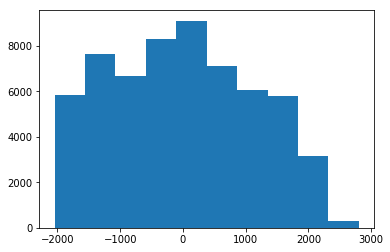

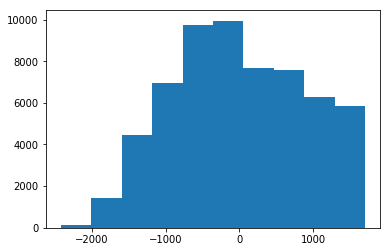

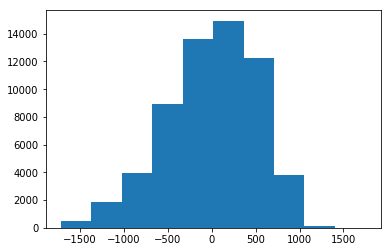

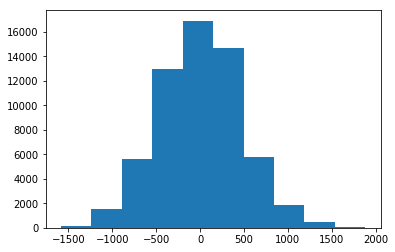

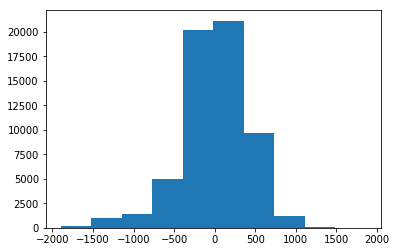

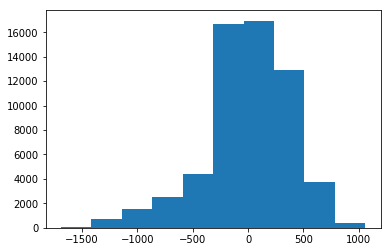

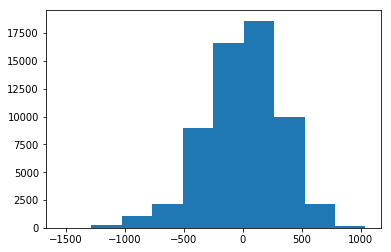

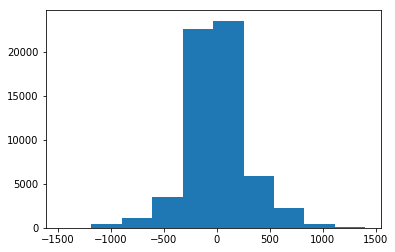

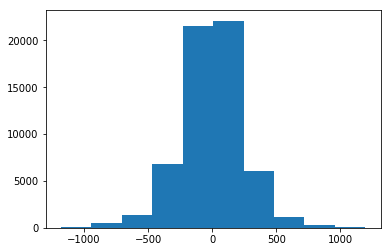

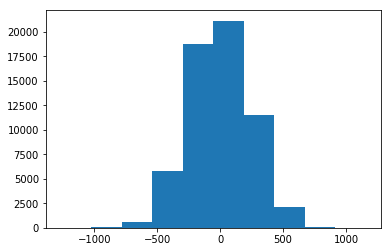

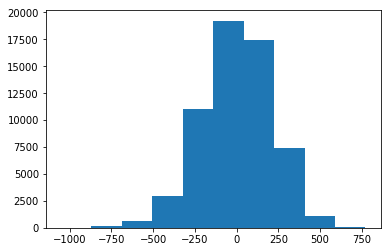

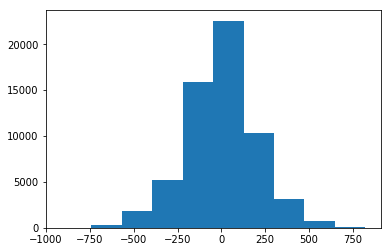

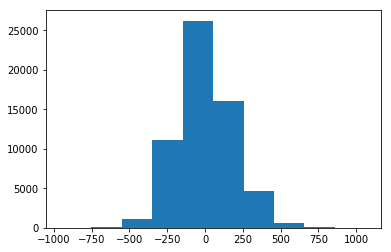

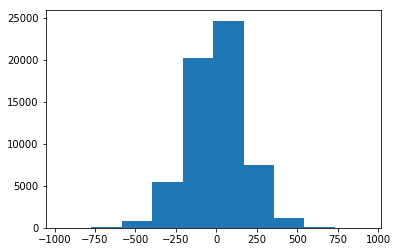

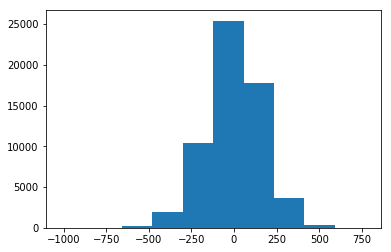

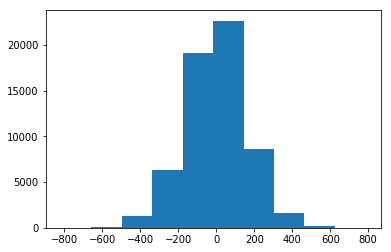

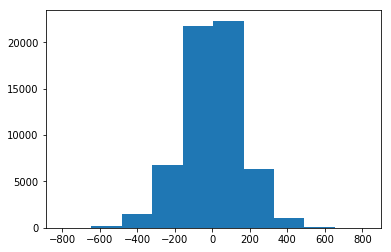

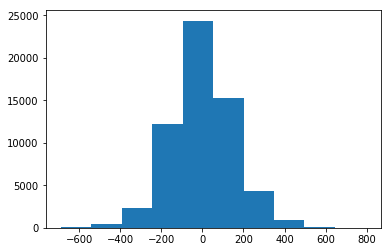

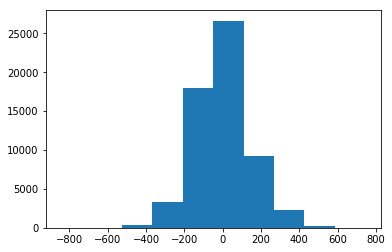

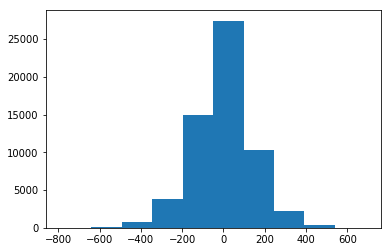

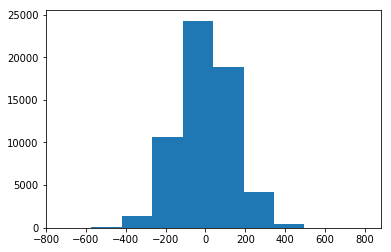

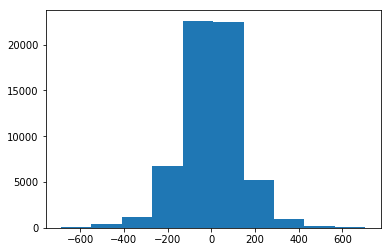

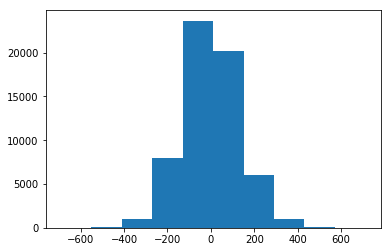

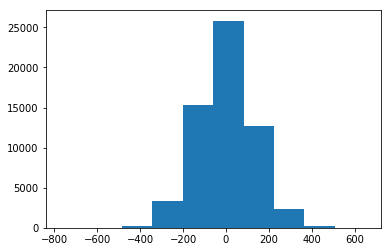

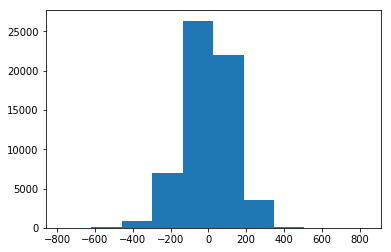

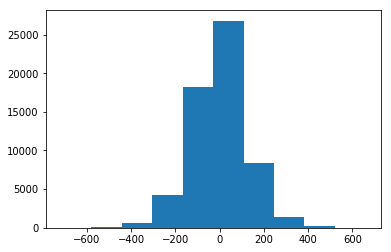

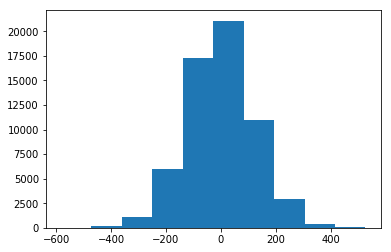

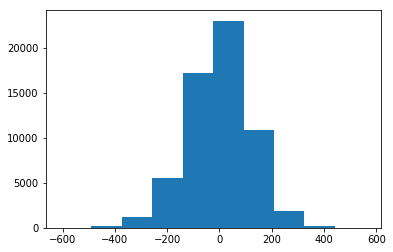

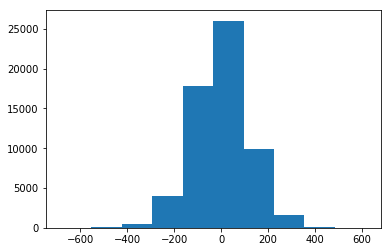

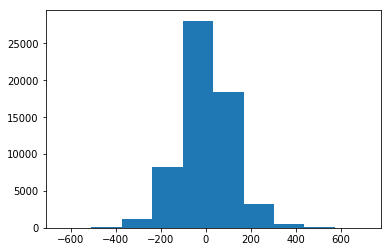

In [18]:
for i in range(train.shape[1]):
    fig=plt.figure()
    plt.hist(list(train[:,i]))

In [104]:
acc_tr=[]
acc=[]
x=np.arange(2,10)
for i in x:
    clf=KNN(i)
    clf.fit(train,y_train)
#     preds_tr=clf.predict(train)
    preds=clf.predict(test)
#     acc_tr.append(results.accuracy(y_train, preds_tr))
    acc.append(results.accuracy(y_test, preds))
    print(i)

KeyboardInterrupt: 

In [103]:
print(acc)

[0.83409999999999995]


In [ ]:
fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr)
ax.scatter(list(x),acc,color='r')

In [ ]:
x=np.arange(3,150,4)
acc_tr=[]
acc=[]
for i in x:
    lab=np.zeros(i)
    kmeans = KMeans(i)
    preds_tr=kmeans.fit_predict(train)
    preds=kmeans.predict(test)
    for j in range(i):
        if((preds_tr==j).shape[0]):
            lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()  
    acc_tr.append(np.sum(y_train==lab[preds_tr])/y_train.shape)
    acc.append(np.sum(y_test==lab[preds])/y_test.shape)

fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr)
ax.scatter(list(x),acc,color='r')

In [98]:
clf = GaussianNB()
clf.fit(train,y_train)
acc_tr=np.sum(y_train==clf.predict(train))/y_train.shape
acc=np.sum(y_test==clf.predict(test))/y_test.shape
print(clf.predict(test))
print(acc,acc_tr)

[5 2 1 ..., 8 1 7]
[ 0.7591] [ 0.77198333]


In [143]:
clf = GaussianBayes()
clf.fit(train,y_train)
acc_tr=np.sum(y_train==clf.predict(train))/y_train.shape
acc=np.sum(y_test==clf.predict(test))/y_test.shape
print(clf.predict(test))
print(acc,acc_tr)

[2 0 2 0 2 2 2 2 1 1 2 2 1 2 1 1 2 0 1 1 1 2 0 1 0 2 0 1 2 1 2 0 2 0 0 1 0
 1 2 0 1 2 2 0 2 0 1 0 1 2 0 0 2 1 1 2 0 2 0 1 0 2 2 2 2 1 1 1 0 0 2 1 0 2
 1 2 0 0 2 1 2 1 1 0 2 0 0 2 2 1 1 0 0 0 2 0 2 2 2 0 0 2 0 2 0 1 1 2 1 1 2
 0 0 1 2 1 2 2 0 0 0 0 1 2 2 0 0 0 1 2 0 2 2 1 1 0 1 0 0 2 1 2 2 1 2 1 2 1
 1 1 2 1 2 2 1 0 0 2 2 1 1 1 1 1 1 1 1 1 0 1 2 0 2 1 0 0 1 2 0 2 0 2 1 2 2
 2 2 0 2 2 0 0 1 1 1 1 0 1 1 2 0 0 1 0 1 0 1 1 2 1 2 1 0 2 2 0 2 2 1 2 2 2
 0 2 1 2 2 2 1 0 2 2 1 2 2 2 2 1 0 0 0 0 1 2 2 0 0 0 0 0 2 1 2 1 1 2 1 0 0
 2 0 1 1 1 1 2 0 2 1 1 0 0 1 0 0 2 0 2 0 2 2 2 2 1 2 0 2 0 0 1 1 1 0 1 2 1
 1 2 2 0 0 0 1 2 1 1 1 0 1 2 2 2 1 2 1 1 0 0 0 2 0 1 2 1 1 2 1 2 0 2 1 2 1
 0 1 0 1 0 0 2 2 1 0 1 1 0 0 1 0 0 0 2 2 0 2 0 1 2 0 1 2 0 1 2 1 2 2 0 2 1
 0 2 2 1 1 1 2 1 0 0 0 0 1 1 1 2 0 0 2 1 0 0 0 1 0 1 0 1 0 2 0 2 0 2 1 2 1
 1 0 2 2 0 1 1 2 2 1 1 1 0 2 1 0 2 2 2 0 0 1 2 0 0 1 1 1 0 2 0 2 0 2 2 1 1
 1 1 2 2 1 0 2 1 2 2 0 1 2 0 1 0 2 1 0 2 1 1 2 0 0 1 2 0 0 2 1 2 0 0 2 2 1
 0 1 2 1 2 1 0 0 1 0 0 1 

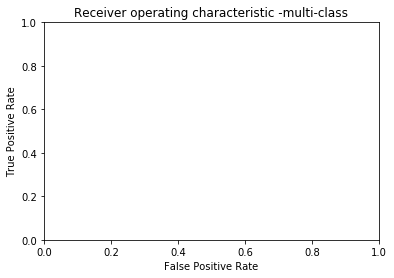

In [8]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
ax.legend(loc="lower right")

# MEDICAL DATA

In [14]:
data = pd.read_csv('Medical_data.csv')
X = data.as_matrix()
print(X)
data = X[:,1:4]
y=np.empty(X.shape[0])
for i in range(X.shape[0]):
    if(X[i,0]=='HEALTHY'):
        y[i]=0
    if(X[i,0]=='SURGERY'):
        y[i]=1
    if(X[i,0]=='MEDICATION'):
        y[i]=2
print(y.shape)        
y=np.array(y,dtype='int')

[['HEALTHY' 1.6315155608144196 -0.26444658130172355 2.534567146651425]
 ['SURGERY' 0.15395105426389907 1.419533481505174 1.3331207912724836]
 ['HEALTHY' 2.021729118164318 0.26204637889999405 2.8799717380508727]
 ..., 
 ['HEALTHY' 0.19320188275265227 0.36039894430698144 1.8676445668171464]
 ['HEALTHY' 1.6840959730399991 -0.02321819895892971 3.306257682435044]
 ['MEDICATION' 0.9752179047232428 2.305958926888452 0.22982688347681815]]
(3000,)


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2)
sss.get_n_splits(data, y)
for train_index, test_index in sss.split(data, y):
    train, y_train = data[train_index], y[train_index]
    test, y_test = data[test_index], y[test_index]

In [16]:
print(train,y_train.shape)

[[-0.12005292953693544 -0.769731863715909 2.1310503102593494]
 [0.883304437829268 2.0356177317342605 -0.1976768570953032]
 [-0.44632141487895743 3.8924282327091526 0.12915545376125967]
 ..., 
 [2.0861847566279974 2.160895715478742 0.3604431919369457]
 [3.010457546684365 1.0380750865342 -0.15256158527070673]
 [1.993378734448228 2.0621189071818047 -0.10819431251759952]] (2400,)


In [53]:
x=np.arange(3,100,4)
acc_tr=[]
acc=[]
for i in x:
    lab=np.zeros(i)
    kmeans = KMeans(i)
    preds_tr=kmeans.fit_predict(train)
    preds=kmeans.predict(test)
#     print(preds_tr)
    for j in range(i):
        lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
    acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape)
    acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape)
    print(i)

[[ 1.10798014  1.10798014  1.10798014]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[ 1.14663061  1.14663061  1.14663061]
 [ 0.43308336  0.43308336  0.43308336]
 [ 0.          0.          0.        ]]
[[ 1.20877267  1.20877267  1.20877267]
 [ 0.61214397  0.61214397  0.61214397]
 [ 0.08134919  0.08134919  0.08134919]]
[[ 1.25901176  1.25901176  1.25901176]
 [ 0.71575627  0.71575627  0.71575627]
 [ 0.24092278  0.24092278  0.24092278]]
[[ 1.30044437  1.30044437  1.30044437]
 [ 0.799009    0.799009    0.799009  ]
 [ 0.37353568  0.37353568  0.37353568]]
[[ 1.33676163  1.33676163  1.33676163]
 [ 0.86692002  0.86692002  0.86692002]
 [ 0.45762324  0.45762324  0.45762324]]
[[ 1.36912684  1.36912684  1.36912684]
 [ 0.91978495  0.91978495  0.91978495]
 [ 0.51284891  0.51284891  0.51284891]]
[[ 1.39273267  1.39273267  1.39273267]
 [ 0.95254408  0.95254408  0.95254408]
 [ 0.54263953  0.54263953  0.54263953]]
[[ 1.41237449  1.41237449  1.41237449]
 [ 0.97843173  0.

 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1

 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1

[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.0860013   1.0860013 ]
 [ 0.67541383  0.67541383  0.67541383]]
[[ 1.492254    1.492254    1.492254  ]
 [ 1.0860013   1.

 [ 0.35054145  0.35054145  0.35054145]]
[[ 1.51077554  1.51077554  1.51077554]
 [ 1.14840552  1.14840552  1.14840552]
 [ 0.86840078  0.86840078  0.86840078]
 [-0.10061713 -0.10061713 -0.10061713]
 [ 0.09713151  0.09713151  0.09713151]
 [ 0.60074863  0.60074863  0.60074863]
 [ 0.38002198  0.38002198  0.38002198]]
[[ 1.52119423  1.52119423  1.52119423]
 [ 1.16461632  1.16461632  1.16461632]
 [ 0.88585257  0.88585257  0.88585257]
 [-0.06458304 -0.06458304 -0.06458304]
 [ 0.19879988  0.19879988  0.19879988]
 [ 0.62085414  0.62085414  0.62085414]
 [ 0.40169062  0.40169062  0.40169062]]
[[ 1.53034673  1.53034673  1.53034673]
 [ 1.18007581  1.18007581  1.18007581]
 [ 0.90403435  0.90403435  0.90403435]
 [-0.06458304 -0.06458304 -0.06458304]
 [ 0.24730872  0.24730872  0.24730872]
 [ 0.6426686   0.6426686   0.6426686 ]
 [ 0.4302458   0.4302458   0.4302458 ]]
[[ 1.54321775  1.54321775  1.54321775]
 [ 1.19584878  1.19584878  1.19584878]
 [ 0.92046587  0.92046587  0.92046587]
 [-0.06458304 -0.0645

 [ 0.78625468  0.78625468  0.78625468]]
[[ 1.67071561  1.67071561  1.67071561]
 [ 1.37739624  1.37739624  1.37739624]
 [ 1.16411964  1.16411964  1.16411964]
 [ 0.36075661  0.36075661  0.36075661]
 [ 0.58431948  0.58431948  0.58431948]
 [ 0.97401903  0.97401903  0.97401903]
 [ 0.79071056  0.79071056  0.79071056]]
[[ 1.67188037  1.67188037  1.67188037]
 [ 1.38076091  1.38076091  1.38076091]
 [ 1.16814979  1.16814979  1.16814979]
 [ 0.36804287  0.36804287  0.36804287]
 [ 0.59076269  0.59076269  0.59076269]
 [ 0.97755148  0.97755148  0.97755148]
 [ 0.79544133  0.79544133  0.79544133]]
[[ 1.67540602  1.67540602  1.67540602]
 [ 1.38553804  1.38553804  1.38553804]
 [ 1.17303268  1.17303268  1.17303268]
 [ 0.37353568  0.37353568  0.37353568]
 [ 0.59697306  0.59697306  0.59697306]
 [ 0.9814262   0.9814262   0.9814262 ]
 [ 0.79993189  0.79993189  0.79993189]]
[[ 1.68024826  1.68024826  1.68024826]
 [ 1.39002676  1.39002676  1.39002676]
 [ 1.1772268   1.1772268   1.1772268 ]
 [ 0.37628727  0.3762

 [ 0.83906738  0.83906738  0.83906738]]
[[ 1.71949204  1.71949204  1.71949204]
 [ 1.43583145  1.43583145  1.43583145]
 [ 1.22309033  1.22309033  1.22309033]
 [ 0.39441772  0.39441772  0.39441772]
 [ 0.62682292  0.62682292  0.62682292]
 [ 1.02677122  1.02677122  1.02677122]
 [ 0.83906738  0.83906738  0.83906738]]
[[ 1.71949204  1.71949204  1.71949204]
 [ 1.43583145  1.43583145  1.43583145]
 [ 1.22309033  1.22309033  1.22309033]
 [ 0.39441772  0.39441772  0.39441772]
 [ 0.62682292  0.62682292  0.62682292]
 [ 1.02677122  1.02677122  1.02677122]
 [ 0.83906738  0.83906738  0.83906738]]
[[ 1.71949204  1.71949204  1.71949204]
 [ 1.43583145  1.43583145  1.43583145]
 [ 1.22309033  1.22309033  1.22309033]
 [ 0.39441772  0.39441772  0.39441772]
 [ 0.62682292  0.62682292  0.62682292]
 [ 1.02677122  1.02677122  1.02677122]
 [ 0.83906738  0.83906738  0.83906738]]
[[ 1.71949204  1.71949204  1.71949204]
 [ 1.43583145  1.43583145  1.43583145]
 [ 1.22309033  1.22309033  1.22309033]
 [ 0.39441772  0.3944

KeyboardInterrupt: 

In [47]:
np.savetxt('preds.csv',lab[preds_tr.astype(int)].astype(int))

In [42]:
print(acc,acc_tr)

[array([ 0.465]), array([ 0.45833333]), array([ 0.46833333])] [array([ 0.44416667]), array([ 0.44958333]), array([ 0.45])]


In [29]:
acc_tr=[]
acc=[]
clf = GaussianBayes()
clf.fit(train,y_train)
acc_tr=np.sum(y_train==clf.predict(train))/y_train.shape[0]
acc=np.sum(y_test==clf.predict(test))/y_test.shape
# print(clf.predict(test))
print(acc,acc_tr)

[ 0.9] 0.904166666667


In [ ]:
fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr)
ax.scatter(list(x),acc,color='r')

print(train.shape)

In [ ]:
%matplotlib inline
for i in range(train.shape[1]):
    fig,ax=plt.subplots()
    plt.hist(list(train[:,i]))

In [28]:
acc_tr=[]
acc=[]
clf=GaussianNB()
clf.fit(train,y_train)
preds_tr=clf.predict(train)
preds=clf.predict(test)
# print(preds_tr,preds)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
# print(y_train,preds_tr)
# print(y_test,preds)

(2400,)
(600,)
[0.90833333333333333] [0.90833333333333333]
[0.89500000000000002] [0.89500000000000002]


# TRAIN SELECTION DATA

In [7]:
data = pd.read_csv('railwayBookingList.csv')

In [6]:
print(data.head())

       caseID  boarded  budget  memberCount preferredClass     sex  age
0   111131089        0    2201            0       FIRST_AC  female    2
1  2489059216        0    1775            3       FIRST_AC    male    0
2  1565109576        1    1775            3       FIRST_AC  female    0
3  1373075087        1    1775            3       FIRST_AC    male    3
4  1598041082        1    1775            3       FIRST_AC  female    2


In [8]:

dict_class={'FIRST_AC':0,'SECOND_AC':1,'THIRD_AC':2,'NO_PREF':3}
for i in range(data.shape[0]):
    data['preferredClass'][i]=dict_class[data['preferredClass'][i]]
    

/home/khushal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
data['sex'][(data['sex']=='male')]=0
data['sex'][(data['sex']=='female')]=1

/home/khushal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/khushal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
sorted_b=np.sort(np.array(data['budget'].unique()))
for x,i in enumerate(sorted_b):
        data['budget'][data['budget']==i]=x

/home/khushal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
data.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age
0,111131089,0,17,0,0,1,2
1,2489059216,0,15,3,0,0,0
2,1565109576,1,15,3,0,1,0
3,1373075087,1,15,3,0,0,3
4,1598041082,1,15,3,0,1,2


In [11]:
y=data['boarded']
X = data.as_matrix()
X=X[:-1,2:]
y=y[:-1]
y=np.array(y)
print(X.shape)

(1309, 5)


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    train, y_train = X[train_index], y[train_index]
    test, y_test = X[test_index], y[test_index]

In [13]:
y_train=np.array(y_train)
train=np.array(train)
test=np.array(test)
y_test=np.array(y_test)

In [11]:
from sklearn.cluster import KMeans
x=np.arange(3,300,4)
acc_tr=[]
acc=[]
for i in x:
    lab=np.zeros(i)
    kmeans = KMeans(n_clusters = i)
    preds_tr=kmeans.fit_predict(train)
    preds=kmeans.predict(test)
#     print(preds_tr)
    for j in range(i):
        lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()  
    acc_tr.append(np.sum(y_train==lab[preds_tr])/y_train.shape)
    acc.append(np.sum(y_test==lab[preds])/y_test.shape)

(1047, 5)


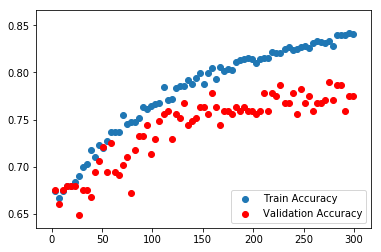

In [86]:
fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr,label='Train Accuracy')
ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
ax.legend(loc='lower right')
print(train.shape)
fig.savefig('ktrs.png')

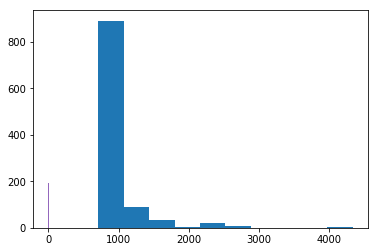

In [80]:
%matplotlib inline
for i in range(train.shape[1]):
    fig,ax=plt.subplots()
    ax.hist(list(train[:,i]))

In [29]:
acc_tr=[]
acc=[]
x=np.arange(1,10)

for i in x:
    clf=KNN(i)
    clf.fit(train,y_train)
    preds_tr=clf.predict(train)
    preds=clf.predict(test)
    acc_tr.append(results.accuracy(y_train, preds_tr))
    acc.append(results.accuracy(y_test, preds))
# print(acc_tr,acc_tr2)
# print(acc,acc2)

NameError: name 'KNN' is not defined

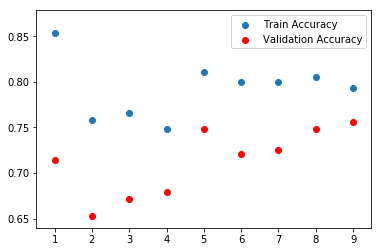

In [60]:
fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr,label='Train Accuracy')
ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
ax.legend(loc='upper right')
# fig.savefig('knntrs.png')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
acc_tr=[]
acc=[]
clf=BinomialNB(5)
clf.fit(train,y_train)
preds_tr=clf.predict(train)
preds=clf.predict(test)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
acc_tr2=[]
acc2=[]

clf2=MultinomialNB()
clf2.fit(train,y_train)
preds_tr=clf2.predict(train)
preds=clf2.predict(test)
acc_tr2.append(results.accuracy(y_train, preds_tr))
acc2.append(results.accuracy(y_test, preds))
print(acc_tr,acc_tr2)
print(acc,acc2)

In [24]:
acc_tr=[]
acc=[]
clf=GaussianNB()
clf.fit(train,y_train)
preds_tr=clf.predict(train)
preds=clf.predict(test)
# print(preds_tr,preds)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
# print(y_train,preds_tr)
# print(y_test,preds)
print(acc,acc_tr)

(1047,)
(262,)
[0.78032473734479468] [0.78032473734479468]
[0.7862595419847328] [0.7862595419847328]


# FINAL RESULTS

|Dataset| Classifier  |   Parameter | Accuracy |Precision | Recall | F1-score |
|--------|:-------:|-----|-------|------|-------|-------|
|Medical Data|KNeighbours|| | || | 
|Medical Data|Gaussian Bayes|| | || | 
|Medical Data|Gaussian Mixture Model Naive Bayes|| | || | 
|Medical Data|Gaussian NB|| ||| |  
|Medical Data|KMeans|| | || | 
|Train Selection Data|KNeighbours|| | || | 
|Train Selection Data|Gaussian Bayes|| | || | 
|Train Selection Data|Gaussian NB|| | || | 
|Train Selection Data|Bionomial NB|| | || | 
|Train Selection Data|KMeans|| | || | 
|Fashion-MNIST|KNeighbours|| | || | 
|Fashion-MNIST|Gaussian Bayes|| | || | 
|Fashion-MNIST|Gaussian NB|| | || | 
|Fashion-MNIST|KMeans|| | || | 